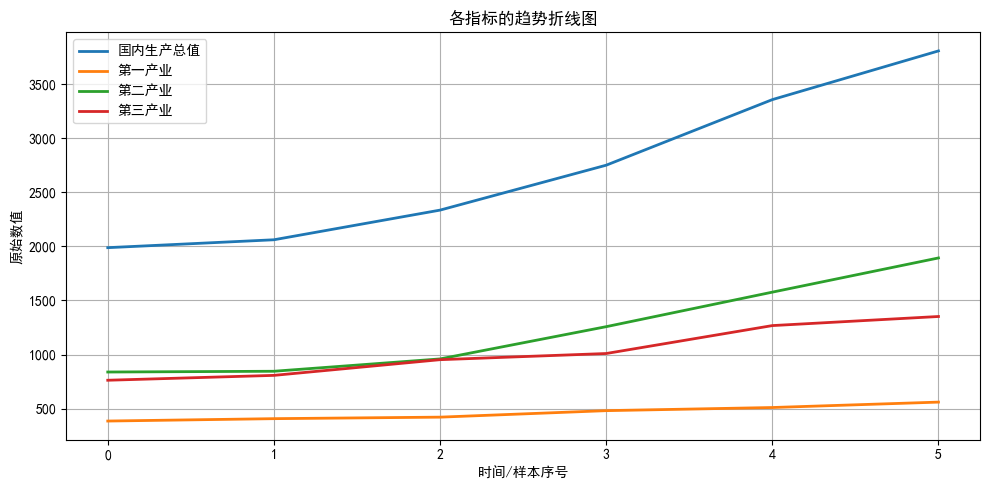

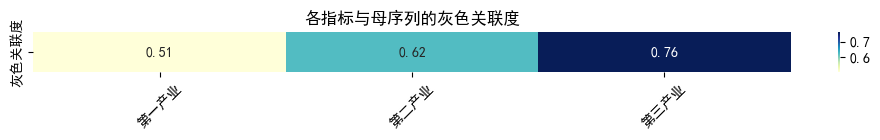

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   # 解决中文字体问题
matplotlib.rcParams['axes.unicode_minus'] = False     # 解决负号显示问题
import seaborn as sns

def gray_relation(gdp: np.ndarray, rho: float = 0.5):
    
    # 1. 均值归一化(如果需要正向化则先正向化)
    mean_cols = gdp.mean(axis=0, keepdims=True)          # (1,n)
    gdp_norm  = gdp / mean_cols                          # (m,n)
    
    # 2. 拆分母序列与子序列
    Y = gdp_norm[:, 0:1]                                 # (m,1)
    X = gdp_norm[:, 1:]                                  # (m,n‑1)
    
    # 3. 计算 |X0 − Xi|
    abs_diff = np.abs(X - Y)                             # (m,n‑1)

    a = abs_diff.min()                                   # 两级最小差
    b = abs_diff.max()                                   # 两级最大差

    # 4. 关联系数 γ_ij
    gamma = (a + rho * b) / (abs_diff + rho * b)         # (m,n‑1)


    # 5. 关联度（列平均）
    gamma_mean = gamma.mean(axis=0)                      # (n‑1,)

    return  gamma_mean, gamma


def plot_gray_heatmap(gamma_mean, feature_names):
    plt.figure(figsize=(10, 1.5))
    sns.heatmap(gamma_mean.reshape(1, -1), annot=True, cmap="YlGnBu",
                xticklabels=feature_names, yticklabels=["灰色关联度"], cbar=True)
    plt.title("各指标与母序列的灰色关联度")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_trend_lines(data_raw: np.ndarray, feature_names: list):
    plt.figure(figsize=(10, 5))
    for i in range(data_raw.shape[1]):
        plt.plot(data_raw[:, i], label=feature_names[i], linewidth=2)
    plt.title("各指标的趋势折线图")
    plt.xlabel("时间/样本序号")
    plt.ylabel("原始数值")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# ==== 示例数据 ====
import pandas as pd

file_path = 'gdp.xlsx'
df = pd.read_excel(file_path)
columns = ['国内生产总值', '第一产业', '第二产业', '第三产业']
df = df[columns]
gdp = df.values


# ==== 分析 ====
gamma_mean, gamma = gray_relation(gdp)

# ==== 可视化 ====
plot_trend_lines(gdp, columns)                 # 折线图含母序列
plot_gray_heatmap(gamma_mean, columns[1:])      # 灰色关联度不含母序列

